In [1]:
# Memanggil Library Pandas
import pandas as pd
# Memanggil Library Numpy
import numpy as np
# Memanggil Library Matplotlib
import matplotlib.pyplot as plt
# Import Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

### Load Dataset

In [2]:
data = pd.read_csv('../Tugas/breast-cancer.data', delimiter=',')

### Memanggil Data

In [3]:
data

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


### Mengecek apakah data set memiliki data NaN

In [4]:
data.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

### Mengecek apakah dataset memiliki data duplikat

In [5]:
data.duplicated().sum()

14

#### Karena ada duplikat, jadi menggunakan fungsi dibawah untuk menghapus dataset yang duplikat

In [6]:
data.drop_duplicates(inplace=True)

### Mengecek kembali apakah masih memiliki data duplikat|

In [7]:
data.duplicated().sum()

0

### Melihat jenis tipe data dari setiap attribut

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        272 non-null    object
 1   age          272 non-null    object
 2   menopause    272 non-null    object
 3   tumor-size   272 non-null    object
 4   inv-nodes    272 non-null    object
 5   node-caps    272 non-null    object
 6   deg-malig    272 non-null    int64 
 7   breast       272 non-null    object
 8   breast-quad  272 non-null    object
 9   irradiat     272 non-null    object
dtypes: int64(1), object(9)
memory usage: 23.4+ KB


### Memisahkan kolom untuk label X dan label Y

In [9]:
data_x = data[['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad']] #Feature
data_y = data["irradiat"] #Target

### melakukan encoding

In [10]:
data_x = pd.get_dummies(data_x)

### Memanggil fungsi encoder disini kami menggunakan Label Encoder

In [11]:
LabeEncode = LabelEncoder()

### Mengencoder dataset

In [12]:
data_y = LabeEncode.fit_transform(data_y)

#### Melakukan pembagian data training dan data test

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=.1)

### Menampilkan jumlah pembagian test dan train split

In [22]:
print(f'panjang x train : {len(x_train)}\n',
f'panjang y train : {len(y_train)}\n',
f'panjang x test : {len(x_test)}\n',
f'panjang y test : {len(y_test)}\n')

panjang x train : 244
 panjang y train : 244
 panjang x test : 28
 panjang y test : 28



### Memanggil fungsi normalisasi yang digunakan disini menggunakan standardScaler

In [23]:
ss = StandardScaler()

### Melakukan Normalisasi

In [24]:
x_ss_train = ss.fit_transform(x_train)
x_ss_test = ss.fit_transform(x_test)

### Membuat Model klasifikasi disini kami menggunakan Naive Bayes

In [25]:
NB = GaussianNB()

### Melakukan Fit Model yang telah dibuat

In [26]:
NB.fit(x_ss_train, y_train)

GaussianNB()

### Ration Train, Test 90:10

In [27]:
NB.score(x_ss_test, y_test)

0.8214285714285714

### Ratio Train, Test 80:20

In [ ]:
NB.score(x_ss_test, y_test)

0.8

### Ratio Train, Test 70:30

In [ ]:
NB.score(x_ss_test, y_test)

0.7804878048780488

### Ration Train, Test 60:40

In [ ]:
NB.score(x_ss_test, y_test)

0.6972477064220184

### Menghitung Hasil Prediksi

In [ ]:
pred_val = NB.predict(x_ss_test)
acc = accuracy_score(y_test, pred_val)

### Menampilkan Hasil Prediksi

In [ ]:
print(f'hasil prediksi : {pred_val}',
    f'Class : {y_test}',
    f'akurasi : {acc}',
    sep='\n')

hasil prediksi : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Class : [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0]
akurasi : 0.8


### Confusion Matrix
- 0 True Label = NO di Nilai Aktual
- 1 True Label = YES di Nilai Aktual
- 0 predicted Label = NO di nilai prediksi
- 1 predicted Label = YES di nilai prediksi

<Figure size 720x720 with 0 Axes>

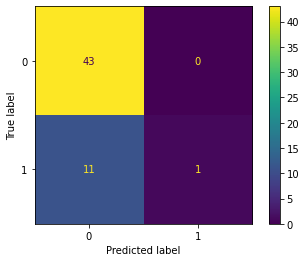

In [ ]:
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test, pred_val)
plt.show()

### Hasil Confusion Matrix
- 10 false negative
- 43 true positive
- 2 true negative
- 0 false positive

### Classification Report

In [ ]:
from sklearn.metrics import classification_report

- Precision adalah semua class yang diprediksi positive berapa jumlah yang benar benar positive hasilnya
- Recall adalah semua class yang positive berapa yang betul betul positive
- f1-score adalah nilai tengah rata rata dari precission dan recall

- precision 0 = true positive : (true positive + false negative)
- precision 1 = false positive : (false positive + true negative)

In [ ]:

print(classification_report(pred_val, y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        54
           1       0.08      1.00      0.15         1

    accuracy                           0.80        55
   macro avg       0.54      0.90      0.52        55
weighted avg       0.98      0.80      0.87        55

